# Feature analysis of the different datasets computed using a different w

In [96]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
%matplotlib inline

In [97]:
# Set the different datasets
npz_key = 'ids2017'
base_path = "C:/Users/verdi/Documents/Datasets/IDS2017/CSV"
w_params = ["15s-5s", "30s-2.5s", "30s-5s", "60s-2.5s", "60s-5s", "120s-2.5s", "120s-5s", "180s-5s"]
rel_path_to_dataset = "processed/feature_group_5.npz"
datasets = {w_param: base_path + "/" + w_param + "/" + rel_path_to_dataset for w_param in w_params}
if all([os.path.exists(p) for _, p in datasets.items()]):
    print("all datasets found on filestore")

all datasets found on filestore


## Geometric intuition
Grasping the relationship between covariance and its eigen-decompositions.

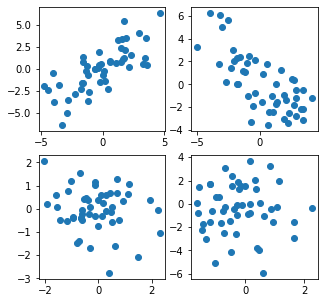

In [113]:
# positive covariance
cov_pos = np.array([[5, 4], [4, 6]])
# negative covariance
cov_neg = np.array([[5, -4], [-4, 6]])
# covariance spreading along the x-axis
cov_spread_x = np.array([[1, 0], [0, 1]])
# covariance spreading along the y-axis
cov_spread_y = np.array([[1, 0], [0, 5]])

np.random.seed(0)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
N = 50
X = np.random.multivariate_normal([0, 0], cov_pos, N)
axs[0, 0].scatter(X[:, 0], X[:, 1])
X = np.random.multivariate_normal([0, 0], cov_neg, N)
axs[0, 1].scatter(X[:, 0], X[:, 1])
X = np.random.multivariate_normal([0, 0], cov_spread_x, N)
axs[1, 0].scatter(X[:, 0], X[:, 1])
X = np.random.multivariate_normal([0, 0], cov_spread_y, N)
axs[1, 1].scatter(X[:, 0], X[:, 1])

plt.show()

[[1.2 1.2]
 [1.2 1.2]]
[[ 3.          7.        ]
 [ 7.         16.33333333]]
[ 2.40000000e+00 -2.22044605e-16]
[ 0.         19.33333333]


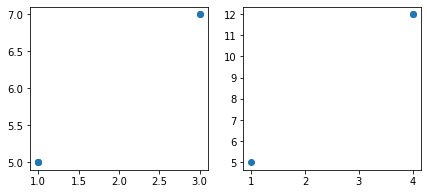

In [99]:
packets = np.array([
    [1, 5],
    [3, 7],
    [1, 5],
    [3, 7],
    [1, 5]
])

flow_w_1 = packets.copy()
flow_w_2 = np.array([
    [4, 12],
    [4, 12],
    [1, 5]
])

cov_w_1 = np.cov(flow_w_1.T)
cov_w_2 = np.cov(flow_w_2.T)
print(cov_w_1)
print(cov_w_2)
print(np.linalg.eigvals(cov_w_1))
print(np.linalg.eigvals(cov_w_2))
_, axs = plt.subplots(1, 2, figsize=(7, 3))
axs[0].scatter(flow_w_1[:, 0], flow_w_1[:, 1])
axs[1].scatter(flow_w_2[:, 0], flow_w_2[:, 1])

plt.show()

In [100]:
w_star = "180s-5s"
# actual worst: "60s-2.5s"
w_worst = "30s-5s"

X_w_star = np.load(datasets[w_star])[npz_key]
X_w_star = X_w_star[:, :-1]
X_w_worst = np.load(datasets[w_worst])[npz_key]
X_w_worst = X_w_worst[:, :-1]

for X in [X_w_star, X_w_worst]:
    cov_mat = np.cov(X.T)
    eig_vals = np.linalg.eigvals(cov_mat)
    print(np.max(eig_vals))

0.17296575312567997
0.28340767455810717


# Training results
Training on models DeppSVDD and MemAE on IDS2017.

In [102]:
path_to_csv = "C:\\Users\\verdi\\Documents\\Datasets\\IDS2017\\timeout_experiment.xlsx"
headers = ['key', 'flow_timeout', 'activity_timeout', 'model', 'precision', 'recall', 'f1',  'epochs', 'N', 'anomaly_threshold', 'anomaly_ratio', 'batch_size']
dtypes = {
    'key': 'object',
    'flow_timeout': np.float16,
    'activity_timeout': np.float16,
    'precision': np.float32,
    'f1': np.float32,
    'N': np.int64,
    'anomaly_threshold': np.float32,
    'anomaly_ratio': np.float32,
    'batch_size': np.int64
}
df = pd.read_excel(path_to_csv, names=headers, dtype=dtypes)
df = df.dropna().sort_values('f1')
df.head(10)

,key,flow_timeout,activity_timeout,model,precision,recall,f1,epochs,N,anomaly_threshold,anomaly_ratio,batch_size
9,60s-2.5s,60.0,2.5,SVDD,0.3570,0.3561,0.3566,200,2910260,73.0,27.0000,128
11,30s-5s,30.0,5.0,SVDD,0.3676,0.3584,0.3630,200,3209990,76.0,24.0000,128
3,120s-5s,120.0,5.0,SVDD,0.4261,0.4135,0.4197,200,2718190,72.0,28.0000,128
7,60s-5s,60.0,5.0,SVDD,0.5083,0.5069,0.5076,200,2910260,73.0,27.0000,128
0,Original dataset,120.0,5.0,SVDD,0.5214,0.5031,0.5121,200,2822083,81.0,0.1969,0
5,120s-2.5s,120.0,2.5,SVDD,0.5622,0.5455,0.5537,200,2718190,72.0,28.0000,128
8,60s-5s,60.0,5.0,MemAE,0.5992,0.5977,0.5985,200,2910260,73.0,27.0000,128
16,15s-5s,15.0,5.0,MemAE,0.6059,0.5966,0.6012,200,3541380,78.0,22.0000,128
12,30s-5s,30.0,5.0,MemAE,0.6107,0.5954,0.6030,200,3209990,76.0,24.0000,128
14,30s-2.5s,30.0,2.5,MemAE,0.6276,0.612,0.6197,200,3209990,76.0,24.0000,128


<Figure size 1000x1000 with 0 Axes>

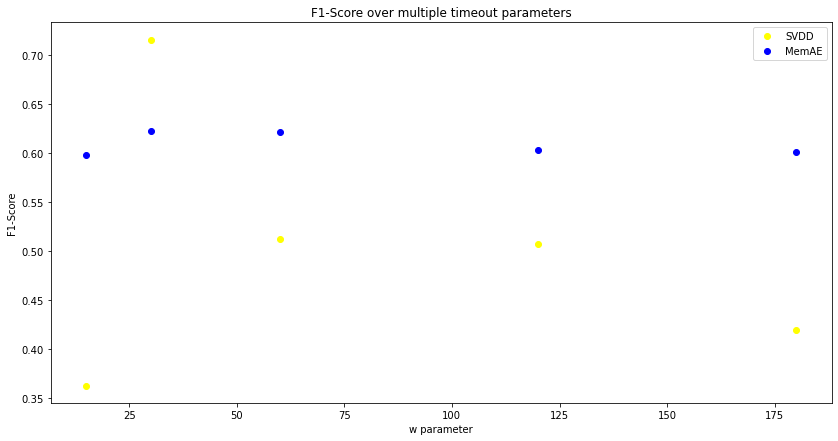

In [104]:
figure(figsize=(10, 10), dpi=100)

models = list(set(df['model']))
df_5s = df[ df['activity_timeout'] == 5.0 ]

fig, ax = plt.subplots(figsize=(14, 7))

colors = ['yellow', 'blue']
for i, model in enumerate(models):
    keys = list(set(df['flow_timeout']))
    f1s = list(df_5s[df_5s['model'] == model]['f1'])
    ax.plot(keys, f1s, 'o', color=colors[i], label=model)

ax.set_xlabel("w parameter")
ax.set_ylabel("F1-Score")
ax.set_title("F1-Score over multiple timeout parameters")
ax.legend()
plt.show()

In [ ]:
df = df[df['model'] == 'SVDD']
x, y = [], []
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']

for w, col in zip(df['key'], colors):
    if w == 'Original dataset':
        continue
    data = np.load(datasets[w])[npz_key]
    # Drop the labels
    data = data[:, :-1]
    cov_mat = np.cov(data.T)
    eig_vals = np.linalg.eigvals(cov_mat)
    max_eig_val = np.max(eig_vals)
    f1 = df[df['key'] == w]['f1'].item()
    print(f1)
    print(max_eig_val)
    x.append(f1)
    y.append(max_eig_val)

In [ ]:
figure(figsize=(10, 10), dpi=100)

for w, col, x, y in zip(df['key'], colors, x, y):
    if w == 'Original dataset':
        continue
    plt.scatter(x, y, color=col, label=w)

plt.xlabel("F1-Score")
plt.ylabel("Max Eig Val")
plt.legend()
plt.show()